# load dataset

In [ ]:
import pandas as pd

splits = {'train': 'data/train-00000-of-00001-daf190ce720b3dbb.parquet', 'test': 'data/test-00000-of-00001-fa9b3e8ade89a333.parquet'}
df = pd.read_parquet("hf://datasets/Deysi/spam-detection-dataset/" + splits["train"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


In [ ]:
df.head()

,text,label
0,hey I am looking for Xray baggage datasets can...,not_spam
1,"""Get rich quick! Make millions in just days wi...",spam
2,URGENT MESSAGE: YOU WON'T BELIEVE WHAT WE HAVE...,spam
3,[Google AI Blog: Contributing Data to Deepfake...,not_spam
4,Trying to see if anyone already has timestamps...,not_spam


In [ ]:
df.tail()

,text,label
8170,"Hi all,\n\nWe create datasets by taking pictur...",not_spam
8171,DEALS! DEALS! DEALS!\n\nHey peeps! You won't b...,spam
8172,Hi\n\nI am working on a project and need penal...,not_spam
8173,Do you want to BLOW UP your social media follo...,spam
8174,WAZZUP MY FELLOW NETIZENS! Time to get your sc...,spam


In [ ]:
import re

df["split_len"] = df["text"].apply(lambda x: len(x.split()))
df["len"] = df["text"].apply(lambda x: len(x))
df["uppercase_count"] = df["text"].apply(lambda x: len(re.findall(r'[A-Z]', x)))
df["lowercase_count"] = df["text"].apply(lambda x: len(re.findall(r'[a-z]', x)))
df["special_count"] = df["text"].apply(lambda x: len(re.findall(r'[!@#$%^&*()_+{}\[\]:;<>,.?\\/-]', x)))
df["numeric_count"] = df["text"].apply(lambda x: len(re.findall(r'[0-9]', x)))

In [ ]:
df.describe()

,split_len,len,uppercase_count,lowercase_count,special_count,numeric_count
count,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000,8175.000000
mean,59.966483,369.111315,17.825199,265.127829,15.717431,3.626422
std,46.345788,565.820388,64.773080,397.279792,71.924798,23.478520
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,175.000000,4.000000,126.000000,5.000000,0.000000
50%,47.000000,284.000000,8.000000,204.000000,9.000000,0.000000
75%,86.000000,507.000000,17.000000,362.500000,16.000000,2.000000
max,791.000000,41544.000000,3759.000000,29667.000000,5508.000000,1630.000000


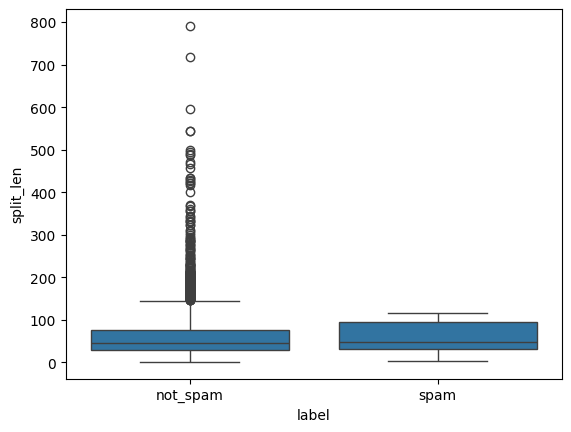

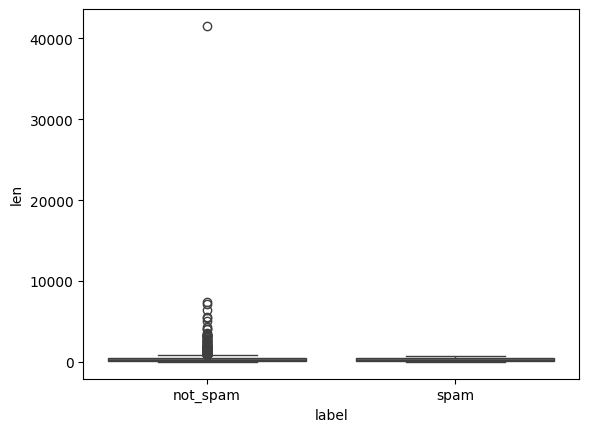

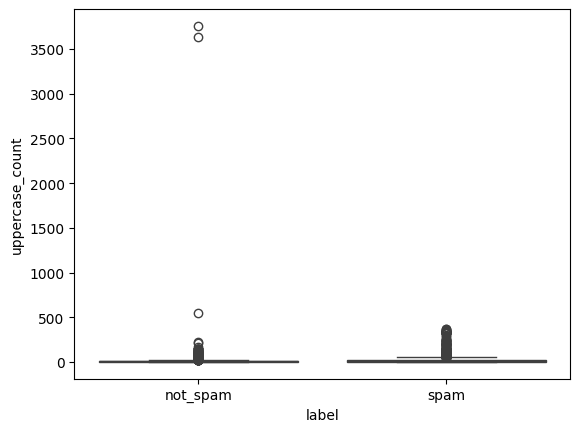

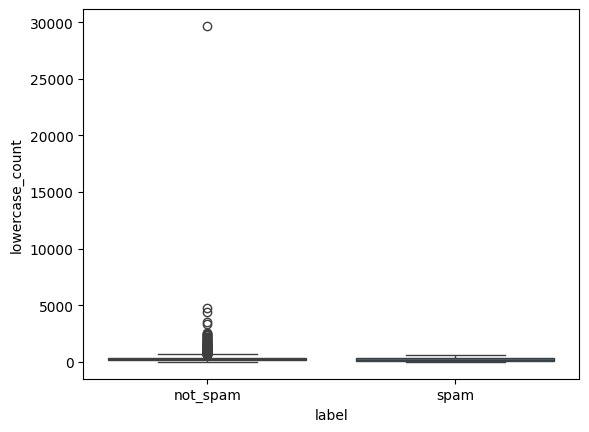

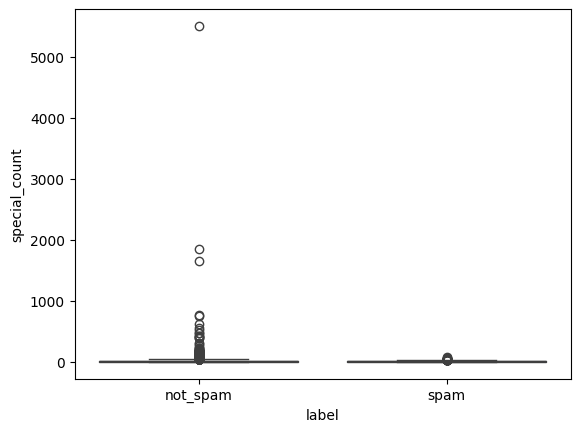

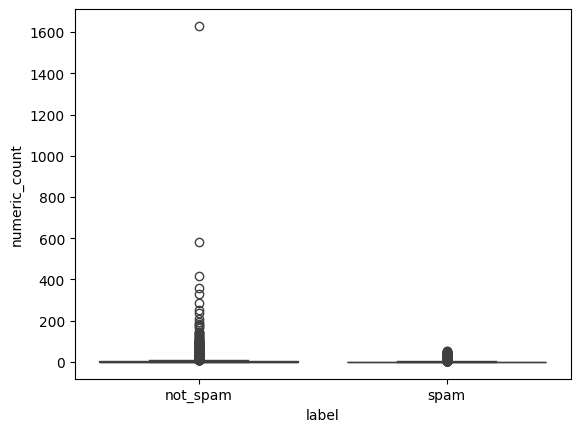

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = df.drop(columns=["text", "label"]).columns
for c in columns:
    sns.boxplot(data=df, x="label", y=c)
    plt.show()

In [ ]:
import spacy

spacy.require_gpu()
# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

data = df["text"]
counter = {}
for d in data:
  doc = nlp(d)
  doc = [token for token in doc if not token.is_stop]
  doc = [token.lemma_ for token in doc]
  for token in doc:
    counter[token] = counter.get(token, 0) + 1  # Increment count for each word
# sort
sorted_counter = {k: v for k, v in sorted(counter.items(), key=lambda item: item[1], reverse=True)}
print(sorted_counter)

{',': 20837, '!': 19014, '.': 15088, '\n\n': 12996, '?': 5953, '-': 5312, ')': 3896, 'datum': 3235, 'dataset': 3124, '/': 3065, 'look': 2807, 'like': 2584, '*': 2374, '(': 2334, 'find': 2289, '"': 2242, '\n': 2034, 'get': 1885, 'new': 1731, 'amazing': 1707, 'time': 1694, 'want': 1683, '[': 1613, ':': 1570, 'social': 1535, 'know': 1534, 'need': 1508, 'free': 1265, 'offer': 1219, 'miss': 1188, ' ': 1176, 'thank': 1167, '#': 1137, 'deal': 1075, '=': 1043, 'help': 1012, 'wait': 1002, 'follower': 981, 'good': 977, 'post': 959, 'work': 914, '$': 888, 'exclusive': 873, 'network': 843, 'right': 834, '🔥': 831, 'product': 816, ';': 803, 'click': 799, 'money': 795, 'late': 782, '&': 768, 'rich': 766, 'medium': 760, 'friend': 752, 'platform': 751, 'share': 750, 'hey': 746, '🤑': 736, 'opportunity': 723, 'project': 716, 'tired': 711, 'try': 709, 'will': 693, 'link': 691, 'use': 688, '🚨': 681, 'start': 680, 'ready': 678, '💰': 675, 'sign': 673, 'feature': 670, 'set': 643, 'check': 638, 'life': 627, 'h

In [ ]:
from torch.utils.data import Dataset, DataLoader